<a href="https://colab.research.google.com/github/Fahadshaari/midterm/blob/main/Copy_of_time_series_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grid Searching and Time Series Forecasting

Use the data below to set up a `Pipeline` that one hot encodes all categorical features and builds a `RandomForestClassifier` model.  Grid search the model for an appropriate `n_estimators` and `max_depth` parameter optimizing precision.  What were the parameters of the best model?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_openml

In [36]:
insurance = fetch_openml(data_id=45064)

In [37]:
insurance.frame.head()

,Upper_Age,Lower_Age,Reco_Policy_Premium,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,class
0,52,52,16200.0,C2,Owned,Individual,No,X4,6.0,4.0,0
1,67,67,16900.0,C17,Rented,Individual,No,X1,7.0,3.0,1
2,75,75,25668.0,C10,Owned,Individual,No,X3,3.0,1.0,0
3,60,57,17586.8,C26,Owned,Joint,Yes,X1,14+,1.0,0
4,35,35,12762.0,C12,Rented,Individual,No,X1,3.0,2.0,0


In [15]:
insurance.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23548 entries, 0 to 23547
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Upper_Age                23548 non-null  int64   
 1   Lower_Age                23548 non-null  int64   
 2   Reco_Policy_Premium      23548 non-null  float64 
 3   City_Code                23548 non-null  category
 4   Accomodation_Type        23548 non-null  category
 5   Reco_Insurance_Type      23548 non-null  category
 6   Is_Spouse                23548 non-null  category
 7   Health Indicator         23548 non-null  category
 8   Holding_Policy_Duration  23548 non-null  category
 9   Holding_Policy_Type      23548 non-null  category
 10  class                    23548 non-null  int64   
dtypes: category(7), float64(1), int64(3)
memory usage: 899.9 KB


In [6]:
insurance.frame.describe()

,Upper_Age,Lower_Age,Reco_Policy_Premium,class
count,23548.000000,23548.000000,23548.000000,23548.000000
mean,48.864192,46.365381,15409.000161,0.242059
std,16.021466,16.578403,6416.327319,0.428339
min,21.000000,16.000000,3216.000000,0.000000
25%,35.000000,32.000000,10704.000000,0.000000
50%,49.000000,46.000000,14580.000000,0.000000
75%,62.000000,60.000000,19140.000000,0.000000
max,75.000000,75.000000,43350.400000,1.000000


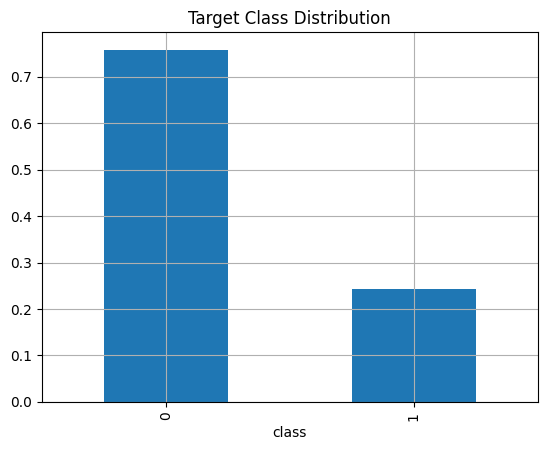

In [7]:
insurance.frame['class'].value_counts(normalize = True).plot(kind = 'bar', grid = True, title = 'Target Class Distribution');

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

In [17]:
print(type(insurance))
print(type(insurance.target))

<class 'sklearn.utils._bunch.Bunch'>
<class 'pandas.core.series.Series'>


In [22]:
categorical_features = ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health_Indicator', 'Holding_Policy_Type']

In [47]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, make_scorer

# Fetch the dataset
insurance = fetch_openml(data_id=45064, as_frame=True)
data = insurance.data
target = insurance.target

# Define categorical and numerical features
categorical_features = ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
                        'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration',
                        'Holding_Policy_Type']
numerical_features = ['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42, stratify=target)

# Set up a column transformer for preprocessing
preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),
    remainder='passthrough'
)

# Set up a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 10, 20, 30,40,50,100]
}

# Set up GridSearchCV with precision as the scoring metric
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring=make_scorer(precision_score, average='binary'),
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best precision score: {best_score}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_precision = precision_score(y_test, y_pred)

print(f"Test set precision score: {test_precision}")


Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameters: {'classifier__max_depth': 100, 'classifier__n_estimators': 100}
Best precision score: 0.2523077799943004
Test set precision score: 0.22857142857142856


### Time Series

For these problems I will reference Hyndman's [*Forecasting: Principles and Practice*](https://otexts.com/fpp3/).  At a minimum, skim chapter 8.1 - 8.4 on Exponential Smoothing methods and 9.1 - 9.5 and 9.9 on ARIMA models.  We will replicate some examples and problems from the text using `sktime`.  Reference the documentation [here](https://www.sktime.net/en/stable/index.html) when needed.



In [88]:
!pip install sktime

In [48]:
import sktime as skt
from sktime.utils.plotting import plot_correlations, plot_series

**PROBLEM**

In 8.1, a simple exponential smoothing model is applied to the algerian export data, and a forecast is made for 5 time steps.  Use `sktime` and the `global_economy` data below to replicate this and evaluate the mean absolute percent error.  

In [49]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

In [50]:
global_economy = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/global_economy.csv', index_col = 0)

In [51]:
algeria = global_economy.loc[global_economy['Country'] == 'Algeria']

In [52]:
algeria.head(3)

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
117,Algeria,DZA,1960,2.723649e+09,NaN,NaN,67.143632,39.043173,11124888.0
118,Algeria,DZA,1961,2.434777e+09,-13.605441,NaN,67.503771,46.244557,11404859.0
119,Algeria,DZA,1962,2.001469e+09,-19.685042,NaN,20.818647,19.793873,11690153.0


In [53]:
algeria_exports = algeria[['Year', 'Exports']].set_index('Year')
algeria_exports = algeria_exports.dropna()

In [54]:
# Train-test split (train the model on all years except the last 5 for testing)
train = algeria_exports[:-5]
test = algeria_exports[-5:]


In [55]:
# Initialize the Exponential Smoothing model
model = ExponentialSmoothing(sp=12)  # sp=12 for monthly data or you can choose for yearly, depending on the context

# Fit the model
model.fit(train)

# Forecast for the next 5 time steps (years in this case)
forecast = model.predict(fh=[1, 2, 3, 4, 5])


In [57]:
# Initialize the MAPE metric
mape = MeanAbsolutePercentageError()

# Evaluate MAPE
error = mape(test, forecast)
print(f'MAPE: {error:.2f}%')


MAPE: 0.48%


**PROBLEM**

Use the data on the Australian population to replicate the exponential smoothing model with a trend from 8.2 [here](https://otexts.com/fpp3/holt.html#example-australian-population).

In [58]:
aus_economy = global_economy.loc[global_economy['Country'] == 'Australia']

In [60]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

aus_economy['Pop'] = aus_economy['Population'] / 1e6

In [61]:
# Fit the model with Holt's linear trend method (additive error, additive trend, no seasonality)
holt_model = ExponentialSmoothing(aus_economy['Pop'], trend='add', seasonal=None)
holt_fit = holt_model.fit()

# Forecast for the next 10 years (adjust 'h' as needed)
forecast = holt_fit.forecast(steps=10)

# Print the forecasted values
print(forecast)


58    24.967775
59    25.336616
60    25.705458
61    26.074299
62    26.443141
63    26.811983
64    27.180824
65    27.549666
66    27.918508
67    28.287349
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


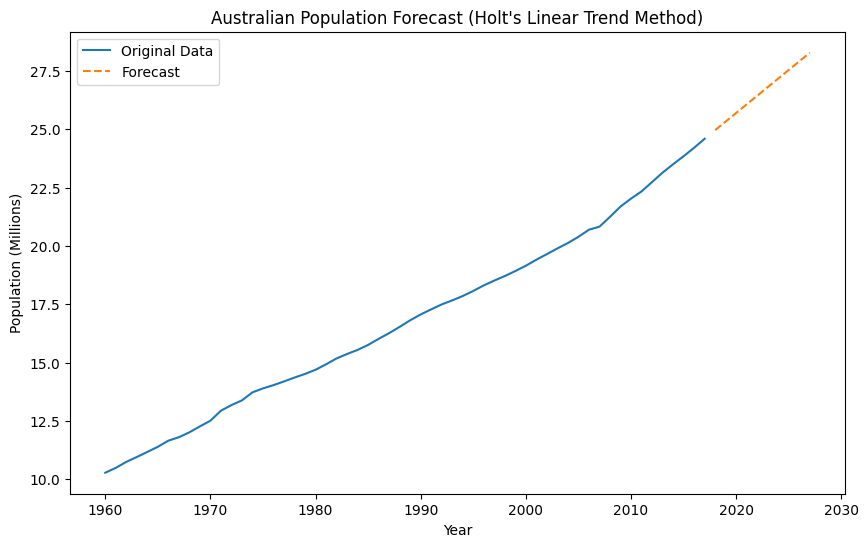

In [62]:
import matplotlib.pyplot as plt

# Plotting the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(aus_economy['Year'], aus_economy['Pop'], label='Original Data')
plt.plot(range(aus_economy['Year'].iloc[-1] + 1, aus_economy['Year'].iloc[-1] + 1 + 10), forecast, label='Forecast', linestyle='--')
plt.title('Australian Population Forecast (Holt\'s Linear Trend Method)')
plt.xlabel('Year')
plt.ylabel('Population (Millions)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


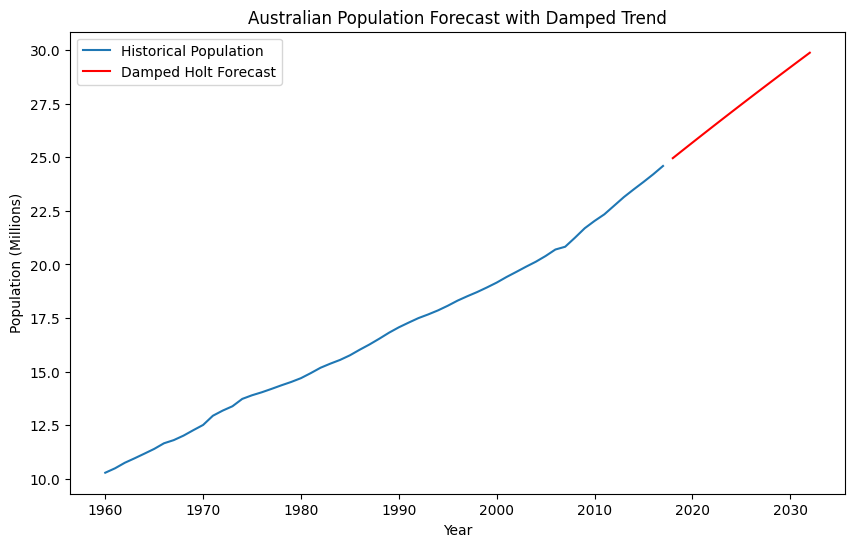

In [65]:

holt_damped_model = ExponentialSmoothing(aus_economy['Pop'], trend='add', seasonal=None, damped_trend=True)
holt_damped_fit = holt_damped_model.fit(optimized=True) # Use optimized=True for better performance

holt_damped_forecast = holt_damped_fit.forecast(steps=15)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(aus_economy['Year'], aus_economy['Pop'], label='Historical Population')
plt.plot(range(aus_economy['Year'].iloc[-1] + 1, aus_economy['Year'].iloc[-1] + 1 + 15), holt_damped_forecast, label='Damped Holt Forecast', color='red')
plt.title('Australian Population Forecast with Damped Trend')
plt.xlabel('Year')
plt.ylabel('Population (Millions)')
plt.legend()
plt.show()

**PROBLEM**

Use the data below on Australian tourism to fit a Holt Winters model with additive and multiplicative seasonality.  Compare the performance using `mape` and plot the results with `plot_series`.

In [68]:
aus_tourism = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/aus_holidays.csv', index_col = 0)
aus_tourism.head()

,Quarter,Trips
1,1998 Q1,11.806038
2,1998 Q2,9.275662
3,1998 Q3,8.642489
4,1998 Q4,9.299524
5,1999 Q1,11.172027


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Load the data
aus_tourism = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/aus_holidays.csv', index_col=0)

# Ensure that the index is a string
aus_tourism.index = aus_tourism.index.astype(str)

# Step 2: Check for any missing or malformed values in the 'Quarter' column
print(aus_tourism.index.str.extract(r'Q(\d+)').isna().sum())  # Check how many rows have NaN after extraction

# Extract Year and Quarter from the 'Quarter' index
aus_tourism['Year'] = aus_tourism.index.str[:4].astype(int)  # Extract Year
aus_tourism['Quarter'] = aus_tourism.index.str.extract(r'Q(\d+)')

# Step 3: Handle missing Quarter values
# If there are NaN values in 'Quarter', you can choose to drop those rows or replace them with a default value
# For this example, we'll drop the rows with NaN Quarter values
aus_tourism = aus_tourism.dropna(subset=['Quarter'])

# Convert Quarter to integer
aus_tourism['Quarter'] = aus_tourism['Quarter'].astype(int)

# Step 4: Merge Year and Quarter columns to form a Date column
# Construct the date as the first day of each respective quarter
aus_tourism['Date'] = pd.to_datetime(aus_tourism['Year'].astype(str) + '-Q' + aus_tourism['Quarter'].astype(str))

# Step 5: Set 'Date' column as index
aus_tourism.set_index('Date', inplace=True)

# Step 6: Fit Holt-Winters models with additive and multiplicative seasonality

# Additive seasonality model
holt_additive_model = ExponentialSmoothing(aus_tourism['Trips'], trend='add', seasonal='add', seasonal_periods=4)
holt_additive_fit = holt_additive_model.fit()

# Multiplicative seasonality model
holt_multiplicative_model = ExponentialSmoothing(aus_tourism['Trips'], trend='add', seasonal='mul', seasonal_periods=4)
holt_multiplicative_fit = holt_multiplicative_model.fit()

# Step 7: Forecast the next 8 quarters
forecast_steps = 8
holt_additive_forecast = holt_additive_fit.forecast(steps=forecast_steps)
holt_multiplicative_forecast = holt_multiplicative_fit.forecast(steps=forecast_steps)

# Step 8: Calculate MAPE for both models
true_values = aus_tourism['Trips'][-forecast_steps:].values
mape_additive = mean_absolute_percentage_error(true_values, holt_additive_forecast)
mape_multiplicative = mean_absolute_percentage_error(true_values, holt_multiplicative_forecast)

# Print MAPE values
print(f'MAPE for Additive Model: {mape_additive}')
print(f'MAPE for Multiplicative Model: {mape_multiplicative}')


plt.figure(figsize=(12, 6))

# Plot the historical data
plt.plot(aus_tourism.index, aus_tourism['Trips'], label='Historical Data', color='blue')

# Plot the forecasts
forecast_index = pd.date_range(aus_tourism.index[-1] + pd.DateOffset(months=3), periods=forecast_steps, freq='Q')
plt.plot(forecast_index, holt_additive_forecast, label='Additive Seasonal Forecast', color='red', linestyle='--')
plt.plot(forecast_index, holt_multiplicative_forecast, label='Multiplicative Seasonal Forecast', color='green', linestyle='--')

# Customize the plot
plt.title('Australian Tourism Forecasting with Holt-Winters')
plt.xlabel('Year')
plt.ylabel('Trips')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()



0    80
dtype: int64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

**PROBLEM**

An example of non-stationary data are stock prices.  Use the stock dataset below to plot the daily closing price for Amazon.  Use differencing to make the series stationary and compare the resulting autocorrelation plots.

In [77]:
stocks = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/gafa_stock.csv', index_col = 0)
stocks.tail()

,Symbol,Date,Open,High,Low,Close,Adj_Close,Volume
5028,GOOG,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300.0
5029,GOOG,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300.0
5030,GOOG,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800.0
5031,GOOG,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800.0
5032,GOOG,2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300.0


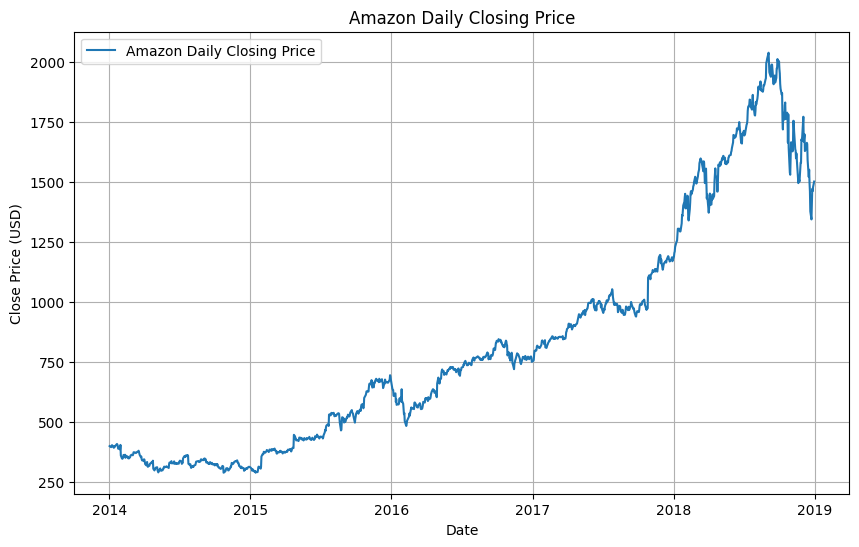

In [78]:

stocks = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/gafa_stock.csv', index_col=0)

# Filter for Amazon stock (Symbol 'AMZN')
amazon_stock = stocks[stocks['Symbol'] == 'AMZN']

# Convert 'Date' to datetime format
amazon_stock['Date'] = pd.to_datetime(amazon_stock['Date'])

# Set the 'Date' as the index
amazon_stock.set_index('Date', inplace=True)

# Plot the daily closing price of Amazon
plt.figure(figsize=(10, 6))
plt.plot(amazon_stock['Close'], label='Amazon Daily Closing Price')
plt.title('Amazon Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


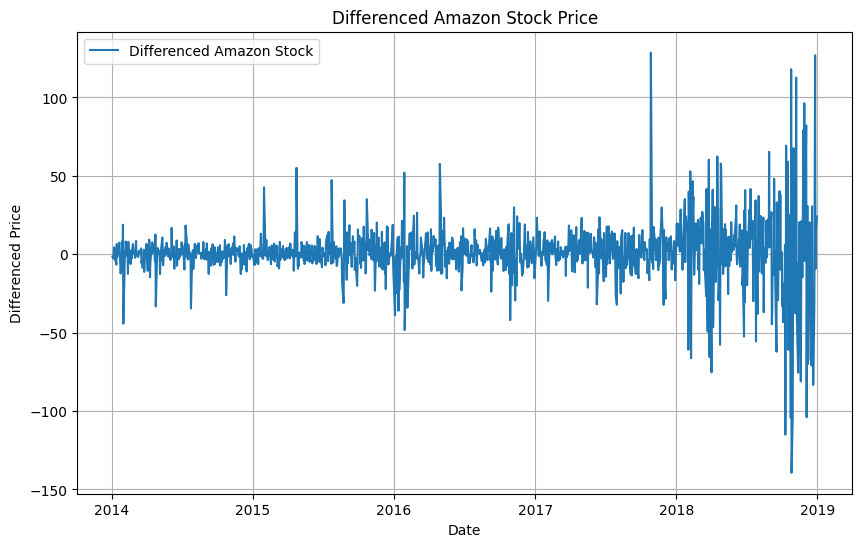

In [79]:
# First differencing
amazon_stock['Differenced'] = amazon_stock['Close'].diff()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(amazon_stock['Differenced'], label='Differenced Amazon Stock')
plt.title('Differenced Amazon Stock Price')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()
plt.grid(True)
plt.show()


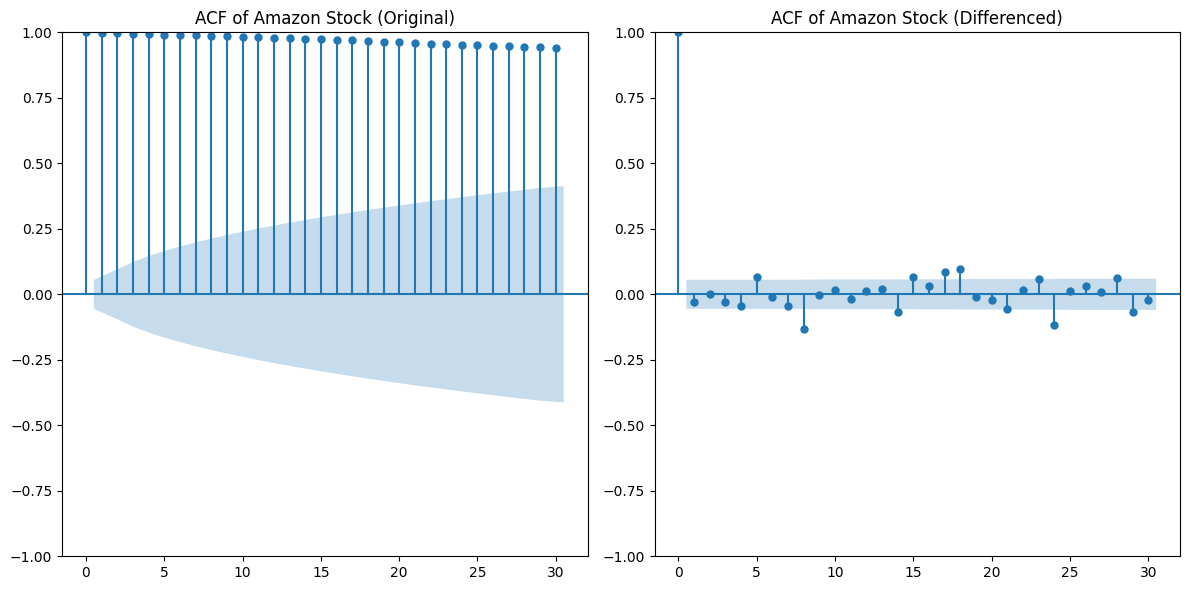

In [80]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF for the original series
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(amazon_stock['Close'].dropna(), lags=30, ax=plt.gca())
plt.title('ACF of Amazon Stock (Original)')

# Plot ACF for the differenced series
plt.subplot(1, 2, 2)
plot_acf(amazon_stock['Differenced'].dropna(), lags=30, ax=plt.gca())
plt.title('ACF of Amazon Stock (Differenced)')
plt.tight_layout()
plt.show()


**PROBLEM**

Use the data on australian air passengers below to fit an `AutoARIMA` model with `sktime`.  What parameters were chosen?  Plot the model and evaluate its predictions on 10 time steps.

In [85]:
aus_air = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/aus_air.csv', index_col = 0)
aus_air.head()

,Year,Passengers
1,1970,7.3187
2,1971,7.3266
3,1972,7.7956
4,1973,9.3846
5,1974,10.6647


In [98]:
!pip install sktime


In [100]:
import sktime as skt
from sktime.utils.plotting import plot_correlations, plot_series

In [103]:
from sktime import AutoARIMA

ImportError: cannot import name 'AutoARIMA' from 'sktime' (/usr/local/lib/python3.10/dist-packages/sktime/__init__.py)

In [86]:


# Step 2: Prepare the data (convert the data to a time series format)
# Here we convert 'Year' to datetime and 'Passengers' to the target variable
aus_air['Year'] = pd.to_datetime(aus_air['Year'], format='%Y')
aus_air.set_index('Year', inplace=True)

# Step 3: Fit an AutoARIMA model
model = AutoARIMA(sp=12, suppress_warnings=True, stepwise=True)
model.fit(aus_air['Passengers'])

# Step 4: Extract the chosen parameters
print(f"Chosen Parameters: {model.get_params()}")

# Step 5: Make forecasts for the next 10 time steps
forecast_steps = 10
forecast = model.predict(fh=forecast_steps)

# Step 6: Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(aus_air.index, aus_air['Passengers'], label='Original Data')
plt.plot(pd.date_range(aus_air.index[-1], periods=forecast_steps + 1, freq='A')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('AutoARIMA Forecast for Australian Air Passengers')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

# Step 7: Evaluate predictions (optional)
# If you'd like to evaluate the model performance, use MAPE or other metrics on known test data
# For this, you may split the data into a train/test set (e.g., using last few years as test set).


NameError: name 'AutoARIMA' is not defined

In [105]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.4 MB/s eta 0:00:00


Passengers    0
dtype: int64


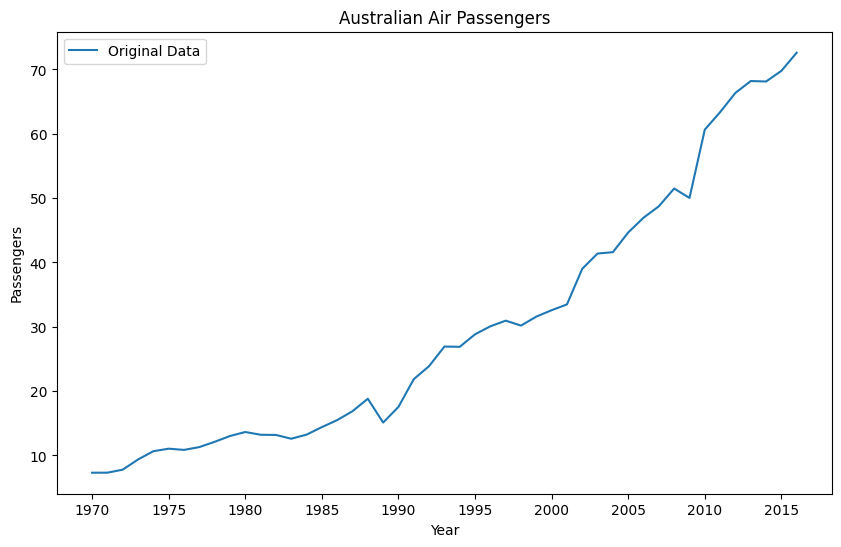

Seasonal differencing needed: 0
Non-seasonal differencing needed: 2


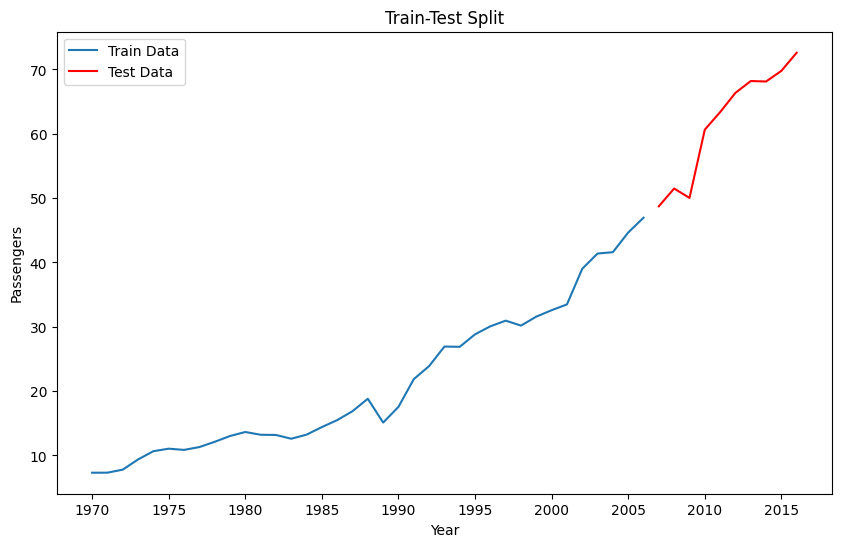

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=0.78 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=152.943, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=149.581, Time=0.05 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=137.212, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=136.378, Time=0.03 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=137.322, Time=0.08 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=138.359, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[12]             : AIC=138.348, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=148.548, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(0,2,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,2,1)(0,0,0)[12]          
Total fit time: 2.039 seconds
                               SARIMAX Results                                
Dep. Variable:          

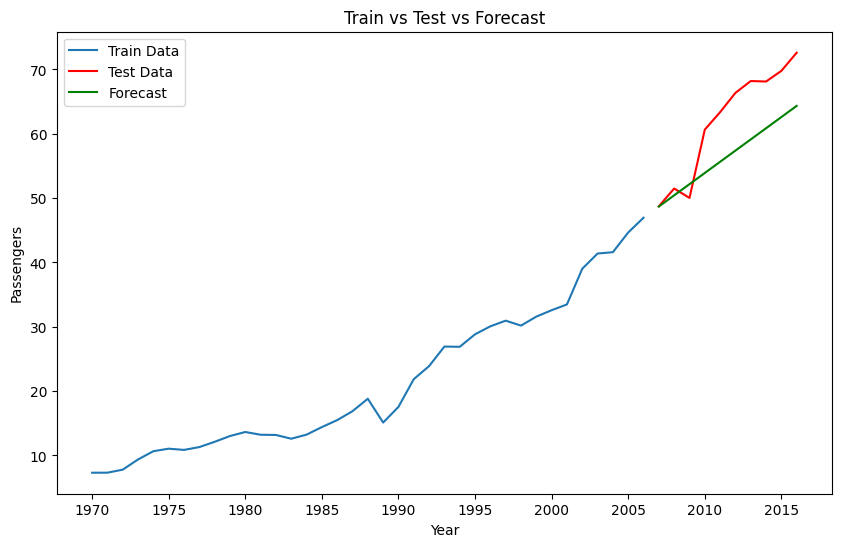

R² Score: 0.3640494237137134
Mean Absolute Error: 5.844071869525296


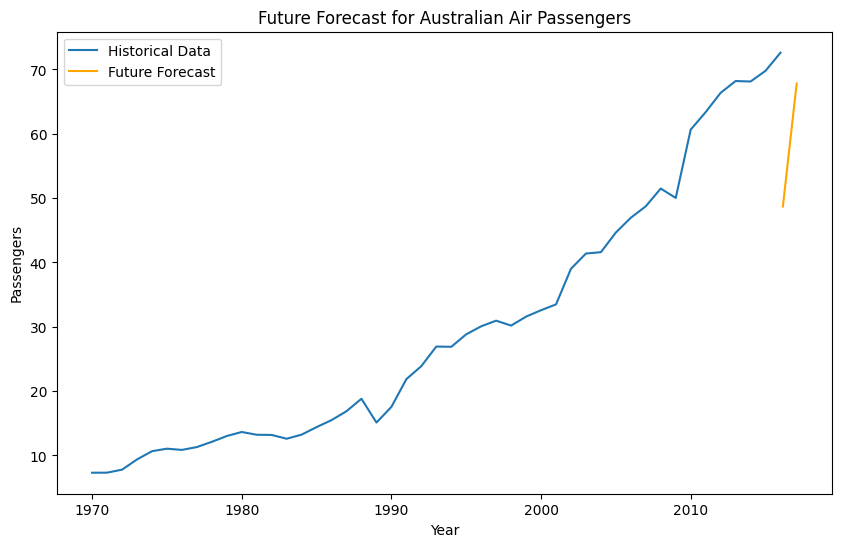

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from pmdarima.arima.utils import ndiffs, nsdiffs
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Load the Data
aus_air = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/aus_air.csv', index_col=0)

# Convert 'Year' to datetime and set as the index
aus_air['Year'] = pd.to_datetime(aus_air['Year'], format='%Y')
aus_air.set_index('Year', inplace=True)

# Step 2: Check for Missing Values
print(aus_air.isnull().sum())

# Step 3: Plot the Data to Observe Trend and Seasonality
plt.figure(figsize=(10, 6))
plt.plot(aus_air.index, aus_air['Passengers'], label='Original Data')
plt.title('Australian Air Passengers')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# Step 4: Check for Stationarity (Test for Differencing Needed)
# Test for seasonal differencing
seasonal_diffs = nsdiffs(aus_air['Passengers'],m=12)
print(f"Seasonal differencing needed: {seasonal_diffs}")

# Test for non-seasonal differencing
non_seasonal_diffs = ndiffs(aus_air['Passengers'])
print(f"Non-seasonal differencing needed: {non_seasonal_diffs}")

# Step 5: Train-Test Split
train = aus_air[:-10]
test = aus_air[-10:]

# Plot Train and Test datasets
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Passengers'], label='Train Data')
plt.plot(test.index, test['Passengers'], label='Test Data', color='red')
plt.title('Train-Test Split')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# Step 6: Build Auto ARIMA Model
# Fit AutoARIMA model on training data
model = auto_arima(train['Passengers'], seasonal=True, m=12,
                   trace=True, error_action='ignore', suppress_warnings=True)

# Display the model summary
print(model.summary())

# Step 7: Forecasting the Future (10 Time Steps)
forecast = model.predict(n_periods=10)

# Step 8: Plot Train, Test, and Forecasted Data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Passengers'], label='Train Data')
plt.plot(test.index, test['Passengers'], label='Test Data', color='red')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('Train vs Test vs Forecast')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# Step 9: Model Evaluation
# R² score for forecast accuracy
r2 = r2_score(test['Passengers'], forecast)
print(f'R² Score: {r2}')

# Mean Absolute Error (MAE) for forecast accuracy
mae = mean_absolute_error(test['Passengers'], forecast)
print(f'Mean Absolute Error: {mae}')

# Step 10: Forecast Future Data (Optional, if you need predictions beyond test data)
future_forecast = model.predict(n_periods=12)  # For example, predicting the next 12 months
future_dates = pd.date_range(start=aus_air.index[-1], periods=13, freq='M')[1:]

# Plot the forecast for future dates
plt.figure(figsize=(10, 6))
plt.plot(aus_air.index, aus_air['Passengers'], label='Historical Data')
plt.plot(future_dates, future_forecast, label='Future Forecast', color='orange')
plt.title('Future Forecast for Australian Air Passengers')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()
